In [9]:
# Self Organizing Map

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [11]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [12]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)


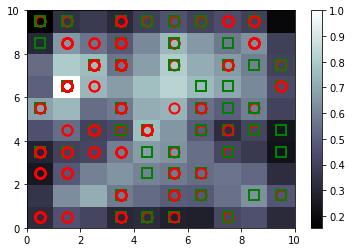

In [13]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
#pcolor(som.distance_map())
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [14]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(7,3)], mappings[(7,4)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [15]:
frauds

array([[1.5704081e+07, 1.0000000e+00, 2.5170000e+01, 3.5000000e+00,
        2.0000000e+00, 1.3000000e+01, 4.0000000e+00, 6.2500000e-01,
        1.0000000e+00, 1.0000000e+00, 7.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 7.0600000e+03],
       [1.5722479e+07, 1.0000000e+00, 2.0670000e+01, 5.2900000e+00,
        2.0000000e+00, 1.1000000e+01, 4.0000000e+00, 3.7500000e-01,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.6000000e+02, 1.0000000e+00],
       [1.5810723e+07, 1.0000000e+00, 3.8170000e+01, 1.0125000e+01,
        2.0000000e+00, 1.4000000e+01, 4.0000000e+00, 2.5000000e+00,
        1.0000000e+00, 1.0000000e+00, 6.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 5.2000000e+02, 1.9700000e+02],
       [1.5730360e+07, 1.0000000e+00, 3.9920000e+01, 6.2100000e+00,
        2.0000000e+00, 1.1000000e+01, 4.0000000e+00, 4.0000000e-02,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00,